In [141]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install umap-learn
!pip install hdbscan
!pip install biopython


In [142]:
import pandas as pd

In [143]:
df = pd.read_csv('../data/02_all_signal_peptides/biochemical_result_w_abundance.csv', index_col=False)

In [144]:
df.head()


,gene,n_relative_length,n_kd_hydrophobicity,n_charge_at_ph7,h_relative_length,h_kd_hydrophobicity,h_charge_at_ph7,c_relative_length,c_kd_hydrophobicity,c_charge_at_ph7,abundance
0,AO090005000016-T-p1,4,0.325000,-0.799151,16,1.582353,-0.586943,2,3.400000,-0.590986,0.000000
1,AO090005000029-T-p1,2,-0.650000,-0.775725,10,1.590909,0.442738,10,-0.145455,-1.505143,0.000033
2,AO090005000042-T-p1,2,-1.000000,0.196884,18,1.184211,0.494293,2,-0.833333,-0.827738,0.000048
3,AO090005000053-T-p1,26,0.684615,2.192839,9,1.660000,-0.572083,5,1.116667,-0.147963,0.000000
4,AO090005000059-T-p1,2,-0.650000,-0.775725,13,1.771429,-0.557223,2,1.633333,-0.857574,0.000000


# UMAP calculation

In [145]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import hdbscan
import seaborn as sns
import matplotlib.colors as mcolors


# Prepare the DataFrame by dropping non-numeric columns
data_for_umap = df.drop(columns=['gene', 'abundance'])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_umap)

# Apply UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=1234)
umap_results = umap_model.fit_transform(scaled_data)

/Users/lucaslevassor/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/projects/Signal_peptide_project/.conda/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


## UMAP clustering with hdbscan

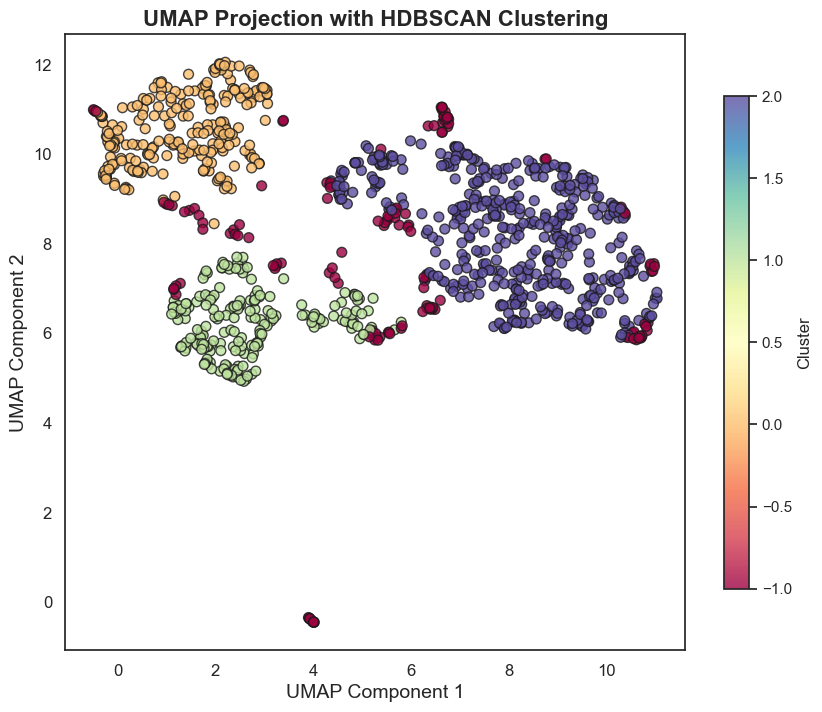

In [146]:
# Set the aesthetic style of the plots
sns.set(style='white', context='notebook')


# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(umap_results)

# Generating a custom discrete colormap
cmap = plt.cm.Spectral
norm = mcolors.Normalize(vmin=cluster_labels.min(), vmax=cluster_labels.max())

# Visualize the results with clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_results[:, 0], umap_results[:, 1], c=cluster_labels, cmap=cmap, norm=norm, s=50, alpha=0.8, edgecolor='k')

# Adding a color bar
plt.colorbar(scatter, label='Cluster', shrink=0.8)

# Enhancing plot aesthetics
plt.title('UMAP Projection with HDBSCAN Clustering', fontsize=16, fontweight='bold')
plt.xlabel('UMAP Component 1', fontsize=14)
plt.ylabel('UMAP Component 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../data/plots/UMAP_hdbscan_clustering.png', dpi=300, bbox_inches='tight')


plt.show()


## UMAP with K-means

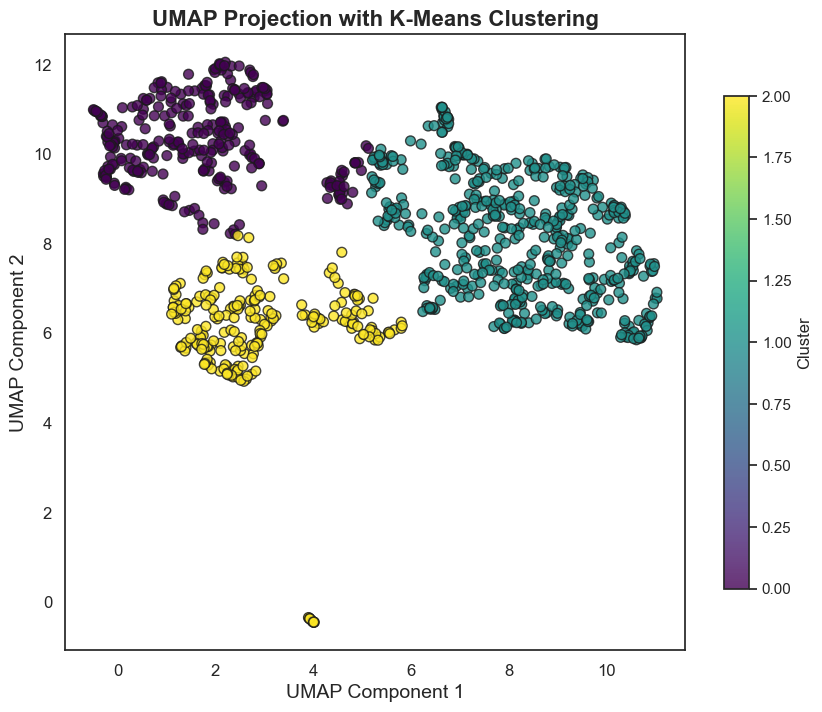

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

NUMBER_OF_CLUSTERS = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=NUMBER_OF_CLUSTERS, random_state=1234)  # Adjust the number of clusters as needed
kmeans_clusters = kmeans.fit_predict(umap_results)

# Set the aesthetic style of the plots
sns.set(style='white', context='notebook')

# Create a color palette
palette = sns.color_palette("bright", NUMBER_OF_CLUSTERS)  # Adjust the number of colors based on clusters

# Visualize the results with clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_results[:, 0], umap_results[:, 1], c=kmeans_clusters, cmap='viridis', s=50, alpha=0.8, edgecolor='k')

# Adding a color bar
plt.colorbar(scatter, label='Cluster', shrink=0.8)

# Enhancing plot aesthetics
plt.title('UMAP Projection with K-Means Clustering', fontsize=16, fontweight='bold')
plt.xlabel('UMAP Component 1', fontsize=14)
plt.ylabel('UMAP Component 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../data/plots/UMAP_kmeans_clustering.png', dpi=300, bbox_inches='tight')


plt.show()


In [148]:
# Add the cluster assignments to your original DataFrame
df['umap_cluster'] = kmeans_clusters

# Now you can see each row with its corresponding cluster
df.head()


,gene,n_relative_length,n_kd_hydrophobicity,n_charge_at_ph7,h_relative_length,h_kd_hydrophobicity,h_charge_at_ph7,c_relative_length,c_kd_hydrophobicity,c_charge_at_ph7,abundance,umap_cluster
0,AO090005000016-T-p1,4,0.325000,-0.799151,16,1.582353,-0.586943,2,3.400000,-0.590986,0.000000,0
1,AO090005000029-T-p1,2,-0.650000,-0.775725,10,1.590909,0.442738,10,-0.145455,-1.505143,0.000033,2
2,AO090005000042-T-p1,2,-1.000000,0.196884,18,1.184211,0.494293,2,-0.833333,-0.827738,0.000048,2
3,AO090005000053-T-p1,26,0.684615,2.192839,9,1.660000,-0.572083,5,1.116667,-0.147963,0.000000,1
4,AO090005000059-T-p1,2,-0.650000,-0.775725,13,1.771429,-0.557223,2,1.633333,-0.857574,0.000000,0


In [149]:

# If you want to see rows belonging to a specific cluster, you can filter the DataFrame
cluster_number = 0  # Change this to the cluster number you're interested in
specific_cluster_df = df[df['umap_cluster'] == cluster_number]
specific_cluster_df.to_csv('../data/02_all_signal_peptides/groups_of_sps/group_data1.csv')

In [150]:
cluster_number = 1  # Change this to the cluster number you're interested in
specific_cluster_df1 = df[df['umap_cluster'] == cluster_number]
specific_cluster_df1.to_csv('../data/02_all_signal_peptides/groups_of_sps/group_data2')

In [151]:
cluster_number = 2  # Change this to the cluster number you're interested in
specific_cluster_df2 = df[df['umap_cluster'] == cluster_number]
specific_cluster_df2.to_csv('../data/02_all_signal_peptides/groups_of_sps/group_data3')

## PCA and t-SNE

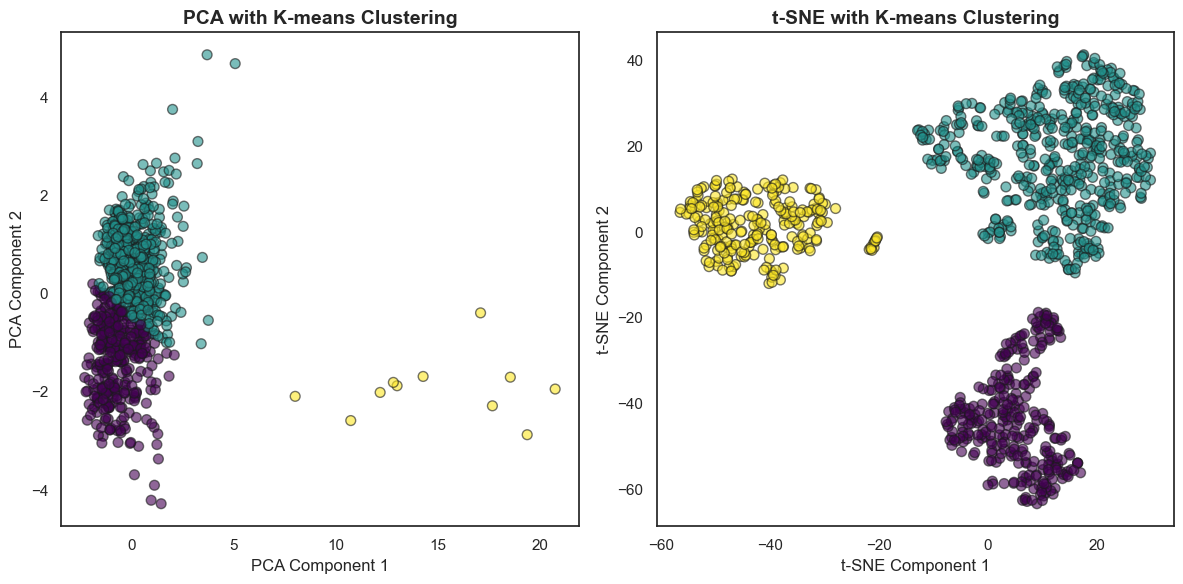

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Assuming 'df' is your DataFrame

# Prepare the DataFrame by dropping the non-numeric column
data_for_analysis = df.drop(columns=['gene', 'abundance'])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_analysis)

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=1234)
tsne_results = tsne.fit_transform(scaled_data)

# Apply K-means clustering
n_clusters = 3  # Adjust based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
pca_clusters = kmeans.fit_predict(pca_results)
tsne_clusters = kmeans.fit_predict(tsne_results)

# Set style for plots
sns.set(style='white', context='notebook')

# Plot PCA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=pca_clusters, cmap='viridis', s=50, alpha=0.6, edgecolor='k')
plt.title('PCA with K-means Clustering', fontsize=14, fontweight='bold')
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)

# Plot t-SNE results
plt.subplot(1, 2, 2)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=tsne_clusters, cmap='viridis', s=50, alpha=0.6, edgecolor='k')
plt.title('t-SNE with K-means Clustering', fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the figure (optional)
plt.savefig('../data/plots/PCA_tSNE_Clustering.png', dpi=300, bbox_inches='tight')

plt.show()


## Comparing clusters

In [153]:
# Add the t-SNE clusters to your DataFrame
df['tsne_cluster'] = tsne_clusters

In [154]:
crosstab = pd.crosstab(df['tsne_cluster'], df['umap_cluster'])
crosstab

umap_cluster,0,1,2
tsne_cluster,,,
0,295,0,0
1,0,518,0
2,0,0,248


## Adjusted Rand Index (ARI) or Normalized Mutual Information (NMI)

In [155]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(df['tsne_cluster'], df['umap_cluster'])

# Calculate Normalized Mutual Information
nmi = normalized_mutual_info_score(df['tsne_cluster'], df['umap_cluster'])

print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Normalized Mutual Information: {nmi:.3f}")


Adjusted Rand Index: 1.000
Normalized Mutual Information: 1.000


## Filtering out gene ids

In [156]:
martis_list = [
    "AO090003001591-T-p1",
    "AO090005001090-T-p1",
    "AO090023000905-T-p1",
    "AO090038000279-T-p1",
    "AO090701000295-T-p1",
    "AO090003001036-T-p1",
    "AO090001000635-T-p1",
    "AO090005000409-T-p1",
    "AO090009000117-T-p1",
    "AO090102000440-T-p1"
]

# Retaining the rows with these gene IDs
retained_df = df[df['gene'].isin(martis_list)]
retained_df

,gene,n_relative_length,n_kd_hydrophobicity,n_charge_at_ph7,h_relative_length,h_kd_hydrophobicity,h_charge_at_ph7,c_relative_length,c_kd_hydrophobicity,c_charge_at_ph7,abundance,umap_cluster,tsne_cluster
35,AO090005000409-T-p1,2,-1.00,0.196884,13,1.392857,-0.557223,2,1.866667,-0.590986,0.029343,1,1
74,AO090005001090-T-p1,2,0.30,-0.803116,13,1.421429,-0.561188,2,1.166667,-0.595509,0.019066,0,0
121,AO090009000117-T-p1,2,-0.80,-0.799151,10,1.881818,-0.533796,4,-0.280000,-1.504960,0.012088,0,0
208,AO090001000635-T-p1,2,-1.00,0.196884,11,1.833333,-0.505667,3,2.250000,-0.823772,0.018076,1,1
276,AO090003001036-T-p1,3,-0.80,-0.799151,12,1.438462,1.438772,3,2.350000,-0.505667,0.001135,2,2
318,AO090003001591-T-p1,4,2.45,-0.799151,10,0.963636,-0.561188,5,1.566667,-0.505667,1.000000,0,0
394,AO090023000905-T-p1,2,2.35,-0.799151,10,1.300000,0.434847,4,1.420000,-0.557223,0.023556,2,2
554,AO090102000440-T-p1,2,-1.30,0.200809,10,1.509091,-0.561188,4,-0.920000,0.434847,0.000119,1,1
671,AO090701000295-T-p1,2,-0.65,-0.775725,11,2.066667,-0.595509,3,0.500000,-0.823772,0.071338,0,0
818,AO090038000279-T-p1,2,-1.30,0.200809,11,2.250000,-0.857574,4,1.100000,-0.147963,0.019407,1,1



### Understanding ARI and NMI:

- **Adjusted Rand Index (ARI)**: Measures the similarity of the two assignments, ignoring permutations and with chance normalization. An ARI score of 1 means perfect labeling alignment, while 0 or negative values indicate no better than random chance.

- **Normalized Mutual Information (NMI)**: Also measures the similarity, but it's normalized to account for chance. Like ARI, a score of 1 indicates perfect agreement, and lower values indicate less agreement.


# Looking at the 3 groupings of Signal peptides through DEEPloc

In [157]:
# Sample DataFrame loading (replace with actual DataFrame loading as needed)
df1_deeploc = pd.read_csv('../data/03_proteomics_data/deeploc_predictions/all_sps/results_646764CA00004786815A8068.csv')
df2_deeploc = pd.read_csv('../data/03_proteomics_data/deeploc_predictions/all_sps/results_6467637F0000328EBD10D7B6.csv')
df3_deeploc = pd.read_csv('../data/03_proteomics_data/deeploc_predictions/all_sps/results_6467641D00003C072DBA1C82.csv')
df_deeploc_data = pd.concat([df1_deeploc, df2_deeploc, df3_deeploc])
df_deeploc_data = df_deeploc_data.rename(columns ={'Protein_ID':'gene'})
df_deeploc_data

,gene,Localizations,Signals,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
0,AO090010000644-T-p1,Extracellular,Signal peptide,0.1605,0.0519,0.9023,0.0443,0.0708,0.0055,0.1702,0.2297,0.1663,0.0011
1,AO090010000654-T-p1,Extracellular,NaN,0.1198,0.0709,0.8547,0.4497,0.0273,0.0097,0.2952,0.2893,0.2882,0.0128
2,AO090010000656-T-p1,Endoplasmic reticulum,Signal peptide,0.2038,0.0767,0.5792,0.0826,0.1869,0.0009,0.6805,0.3273,0.3636,0.0029
3,AO090010000666-T-p1,Extracellular,NaN,0.1090,0.1130,0.7348,0.2847,0.0685,0.0040,0.1425,0.2120,0.1515,0.0225
4,AO090010000684-T-p1,Extracellular,Signal peptide,0.2060,0.0804,0.8861,0.1915,0.1673,0.0193,0.1793,0.1506,0.0989,0.0019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,AO090010000615-T-p1,Golgi apparatus,Signal peptide|Transmembrane domain,0.1426,0.0720,0.5891,0.0775,0.1246,0.0112,0.5028,0.3460,0.9420,0.0082
496,AO090010000619-T-p1,Extracellular,Signal peptide,0.2045,0.0564,0.9545,0.1254,0.0365,0.0091,0.2726,0.3093,0.2011,0.0031
497,AO090010000622-T-p1,Cell membrane,Signal peptide,0.1687,0.0605,0.5742,0.6268,0.0458,0.0067,0.3746,0.4468,0.3464,0.0141
498,AO090010000631-T-p1,Extracellular,Signal peptide,0.1509,0.0239,0.8992,0.0856,0.0928,0.0319,0.1862,0.2210,0.1559,0.0015


In [158]:
cluster1 = specific_cluster_df.merge(df_deeploc_data,on='gene')
cluster2 = specific_cluster_df1.merge(df_deeploc_data,on='gene')
cluster3 = specific_cluster_df2.merge(df_deeploc_data,on='gene')

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_10511/2898992373.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=counts.index, y=counts.values, palette=palette[:counts.size])
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_10511/2898992373.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=counts.index, y=counts.values, palette=palette[:counts.size])
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_10511/2898992373.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=counts.in

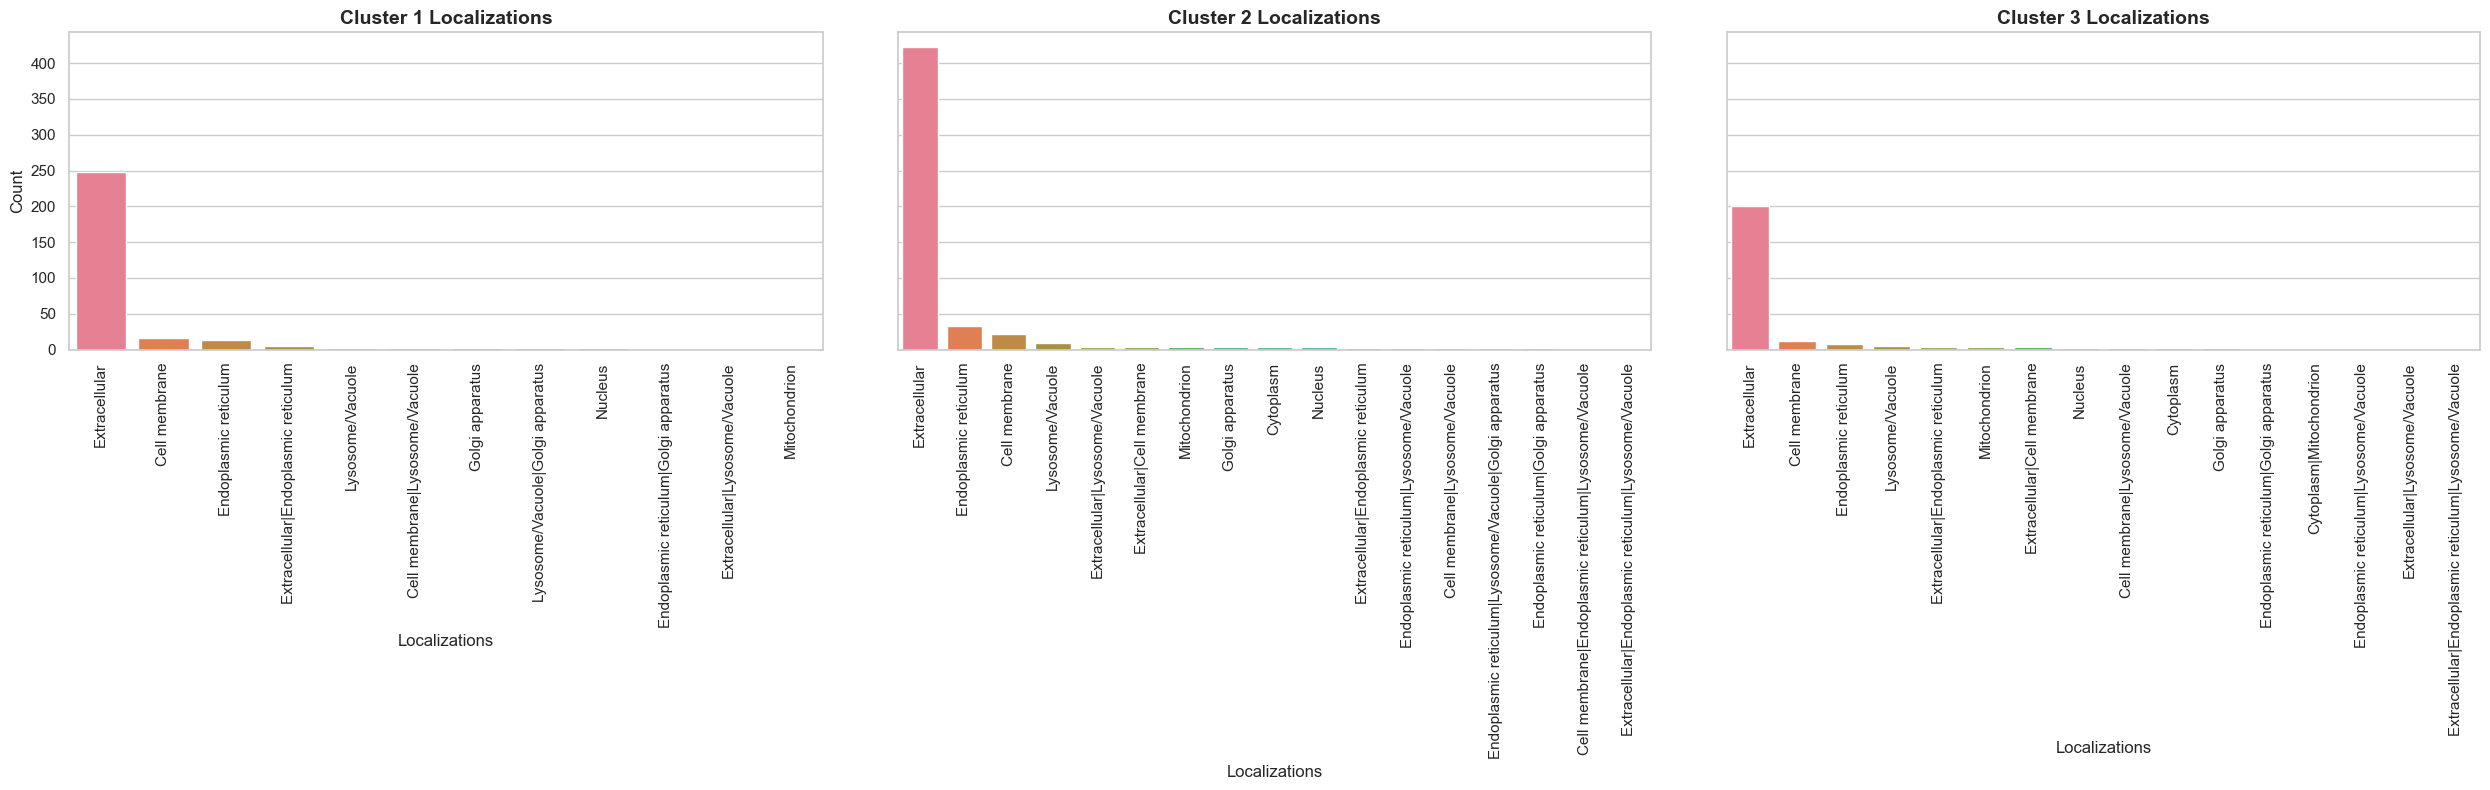

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get localization counts
def get_localization_counts(df):
    return df['Localizations'].value_counts()

# Get counts for each cluster
counts1 = get_localization_counts(cluster1)
counts2 = get_localization_counts(cluster2)
counts3 = get_localization_counts(cluster3)

# Set the aesthetics for the plots
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 10, 'font.family': 'sans-serif'})

# Create subplots with larger figure size
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8), sharey=True)

# Define a color palette with enough colors
max_unique_values = max(counts1.size, counts2.size, counts3.size)
palette = sns.color_palette("husl", max_unique_values)

# Function to create a barplot for a cluster
def create_barplot(ax, counts, title):
    sns.barplot(ax=ax, x=counts.index, y=counts.values, palette=palette[:counts.size])
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Localizations', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='x', rotation=90)  # Rotate labels

# Create bar plots for each cluster
create_barplot(axes[0], counts1, 'Cluster 1 Localizations')
create_barplot(axes[1], counts2, 'Cluster 2 Localizations')
create_barplot(axes[2], counts3, 'Cluster 3 Localizations')

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)  # Adjust horizontal spacing
plt.show()


In [160]:
cluster1

,gene,n_relative_length,n_kd_hydrophobicity,n_charge_at_ph7,h_relative_length,h_kd_hydrophobicity,h_charge_at_ph7,c_relative_length,c_kd_hydrophobicity,c_charge_at_ph7,...,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
0,AO090005000016-T-p1,4,0.325000,-0.799151,16,1.582353,-0.586943,2,3.400000,-0.590986,...,0.2843,0.1888,0.3171,0.4670,0.0669,0.0112,0.2990,0.4726,0.4135,0.0131
1,AO090005000059-T-p1,2,-0.650000,-0.775725,13,1.771429,-0.557223,2,1.633333,-0.857574,...,0.0806,0.0411,0.9710,0.0726,0.0788,0.0032,0.2639,0.1776,0.0810,0.0019
2,AO090005000065-T-p1,2,-1.300000,0.200809,13,2.021429,-0.557223,7,-0.475000,1.176148,...,0.1240,0.0622,0.9500,0.0495,0.0299,0.0119,0.1646,0.2611,0.1984,0.0058
3,AO090005000093-T-p1,2,3.200000,-0.799151,13,1.771429,-0.595509,5,1.750000,-0.823772,...,0.1606,0.1652,0.3887,0.1444,0.1350,0.0183,0.8746,0.1981,0.2632,0.0115
4,AO090005000108-T-p1,2,-0.650000,-0.775725,10,1.709091,-0.557223,4,0.240000,-0.505667,...,0.1096,0.2313,0.2558,0.0768,0.1287,0.0422,0.7381,0.3057,0.2270,0.0011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,AO090103000214-T-p1,2,2.850000,-0.799151,10,1.736364,-0.557223,7,0.087500,0.466164,...,0.1695,0.0495,0.7960,0.0880,0.0562,0.0133,0.3721,0.4324,0.1883,0.0046
291,AO090103000216-T-p1,3,1.666667,-0.799151,9,2.720000,-0.667559,4,1.160000,0.438812,...,0.1265,0.0820,0.9249,0.1861,0.0389,0.0037,0.1614,0.1166,0.1186,0.0064
292,AO090103000239-T-p1,2,-0.650000,-0.775725,9,1.690000,-0.557223,3,1.850000,-0.857574,...,0.0743,0.0240,0.9668,0.1571,0.2152,0.0268,0.1636,0.0973,0.1599,0.0051
293,AO090103000308-T-p1,2,1.850000,-0.799151,15,1.812500,-0.533796,2,-0.700000,-1.556515,...,0.1627,0.1112,0.9563,0.0963,0.0491,0.0029,0.3234,0.2204,0.1485,0.0079


## Gene ontology of different groups of SPs

In [161]:
cluster1 = list(specific_cluster_df['gene'])
cluster2 = list(specific_cluster_df1['gene'])
cluster3 = list(specific_cluster_df2['gene'])

These cluster were sent to FUNGIDB and go annotation was made:

In [162]:
# Sample DataFrame loading (replace with actual DataFrame loading as needed)
df1 = pd.read_csv('../data/14_GO_analysis/hiddenGoEnrichmentResult_group1.tsv', sep='\t')
df2 = pd.read_csv('../data/14_GO_analysis/hiddenGoEnrichmentResult_group2.tsv', sep='\t')
df3 = pd.read_csv('../data/14_GO_analysis/hiddenGoEnrichmentResult_group3.tsv', sep='\t')
df1

,ID,Name,Bgd count,Result count,Result gene list,Pct of bgd,Fold enrichment,Odds ratio,P-value,Benjamini,Bonferroni
0,GO:0005975,carbohydrate metabolic process,458,51,"AO090001000208,AO090001000221,AO090001000348,A...",11.1,5.37,7.18,1.310029e-23,8.122179e-21,8.122179e-21
1,GO:0016052,carbohydrate catabolic process,244,35,"AO090001000208,AO090001000221,AO090001000348,A...",14.3,6.92,9.04,6.910036e-20,2.142111e-17,4.284222e-17
2,GO:0005976,polysaccharide metabolic process,189,31,"AO090001000208,AO090001000221,AO090001000348,A...",16.4,7.92,10.44,1.902719e-19,3.932285e-17,1.179686e-16
3,GO:0000272,polysaccharide catabolic process,146,27,"AO090001000208,AO090001000221,AO090001000348,A...",18.5,8.93,11.90,1.881891e-18,2.916931e-16,1.166772e-15
4,GO:0009057,macromolecule catabolic process,372,35,"AO090001000208,AO090001000221,AO090001000348,A...",9.4,4.54,5.55,4.502993e-14,5.583711e-12,2.791855e-11
...,...,...,...,...,...,...,...,...,...,...,...
120,GO:0090605,submerged biofilm formation,39,3,"AO090003000990,AO090003001209,AO090023000905,",7.7,3.71,3.97,4.648263e-02,2.381755e-01,1.000000e+00
121,GO:0042710,biofilm formation,40,3,"AO090003000990,AO090003001209,AO090023000905,",7.5,3.62,3.87,4.950875e-02,2.455634e-01,1.000000e+00
122,GO:0006040,amino sugar metabolic process,40,3,"AO090003001410,AO090020000207,AO090103000180,",7.5,3.62,3.87,4.950875e-02,2.455634e-01,1.000000e+00
123,GO:0098630,aggregation of unicellular organisms,40,3,"AO090003000990,AO090003001209,AO090023000905,",7.5,3.62,3.87,4.950875e-02,2.455634e-01,1.000000e+00


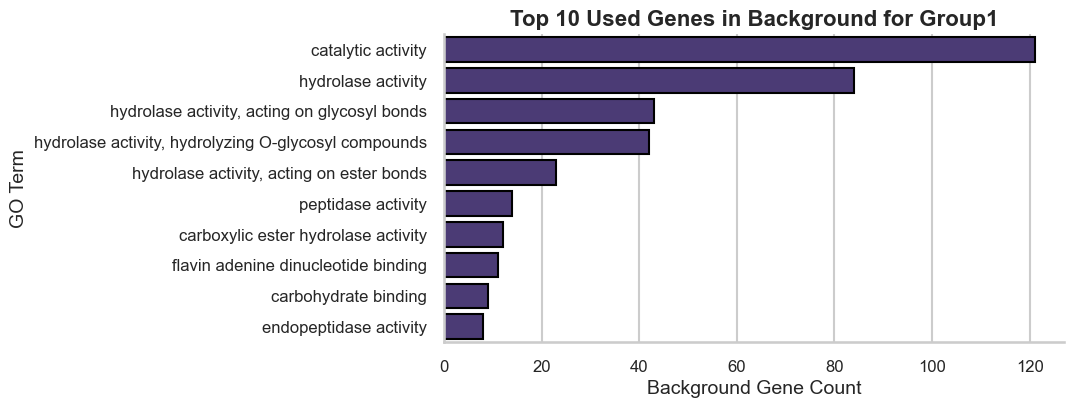

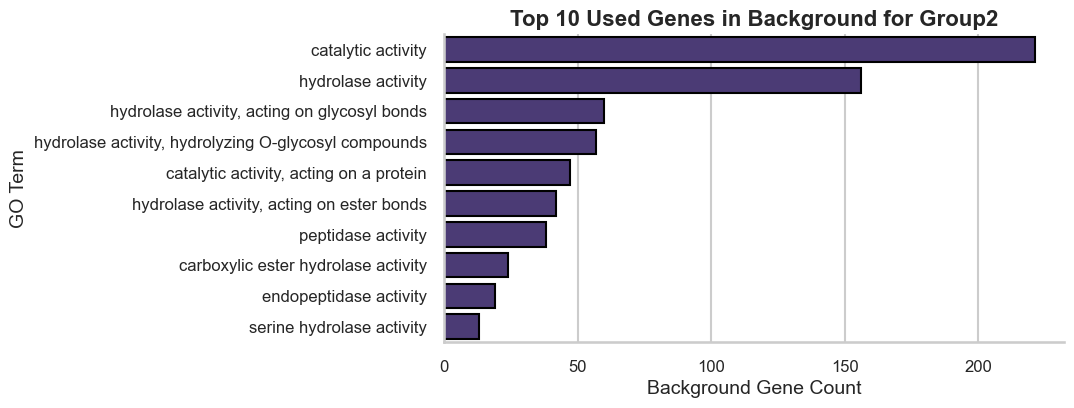

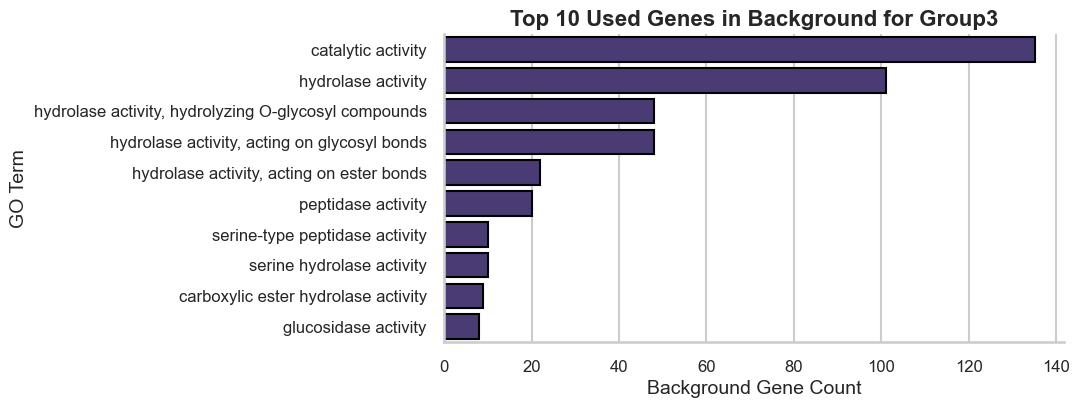

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming df1, df2, df3 are your dataframes

def plot_top_bgd_genes(df, title, top_n=10):
    # Sort the dataframe by 'Result count' and select top N
    df_sorted = df.sort_values(by='Result count', ascending=False).head(top_n)

    # Setting the aesthetic style for the plots
    sns.set(style='whitegrid', context='talk', palette='viridis')

    # Plotting
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Result count', y='Name', data=df_sorted, edgecolor='black')
    plt.title(f'Top {top_n} Used Genes in Background for {title}', fontsize=16, fontweight='bold')
    plt.xlabel('Background Gene Count', fontsize=14)
    plt.ylabel('GO Term', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine()  # Removes top and right spines for a cleaner plot

    # Save the figure (optional)
    plt.savefig(f'../data/plots/{title}_Top_Background_Genes.png', dpi=300, bbox_inches='tight')

    plt.show()

# Plotting for each DataFrame
plot_top_bgd_genes(df1, 'Group1')
plot_top_bgd_genes(df2, 'Group2')
plot_top_bgd_genes(df3, 'Group3')


In [169]:
# Molecular functions for the grouping of signal peptides
df1 = pd.read_csv('../data/14_GO_analysis/group1_mol_function_GO.tsv', sep='\t')
df2 = pd.read_csv('../data/14_GO_analysis/group2_mol_function_GO.tsv', sep='\t')
df3 = pd.read_csv('../data/14_GO_analysis/group3_mol_function_GO.tsv', sep='\t')


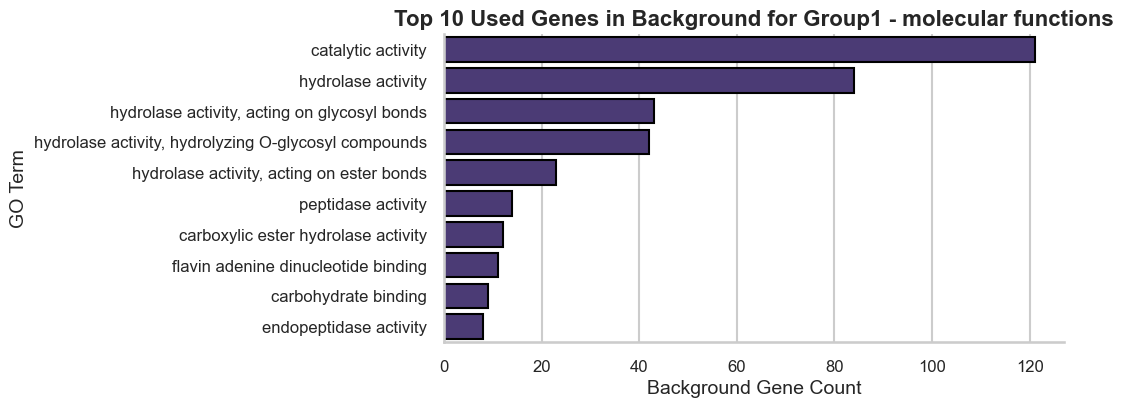

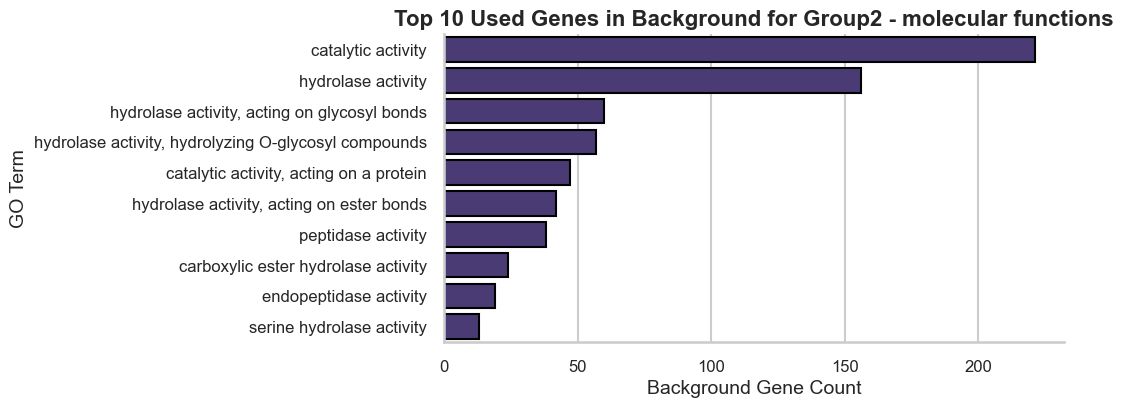

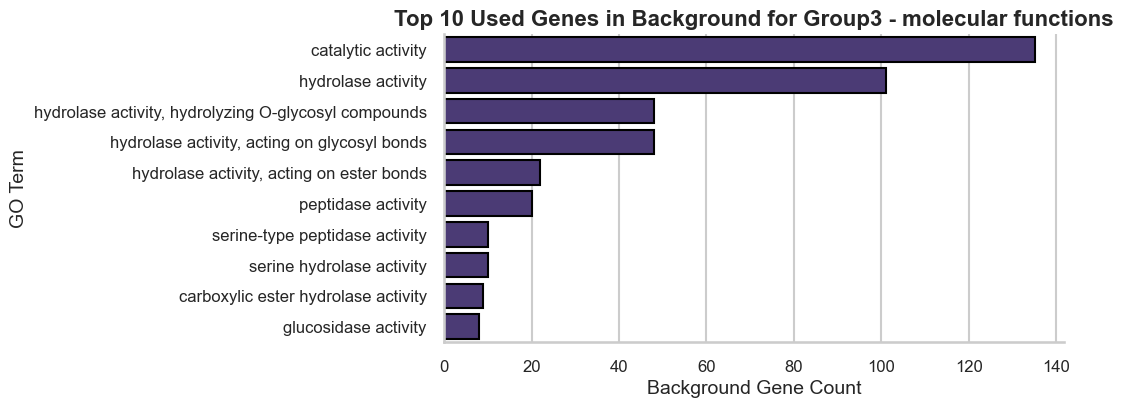

In [170]:
# Plotting for each DataFrame
plot_top_bgd_genes(df1, 'Group1 - molecular functions')
plot_top_bgd_genes(df2, 'Group2 - molecular functions')
plot_top_bgd_genes(df3, 'Group3 - molecular functions')